# Data Wrangling with Pandas

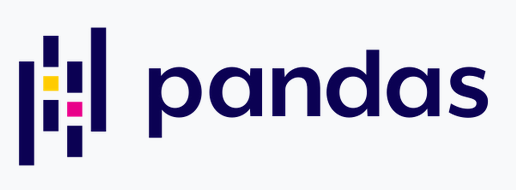

In [1]:
import pandas as pd 
import numpy as np

## Data Loading and Preprocessing

We will use the data from [Wikipedia](https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States#cite_note-47) of historical rankings of presidents of the United States. 

In political studies, surveys have been conducted in order to construct historical rankings of the success of the presidents of the United States. Ranking systems are usually based on surveys of academic historians and political scientists or popular opinion.

In [86]:
presidents = pd.read_csv('./data/presidents.csv', index_col=0)
presidents.head()

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8


In [87]:
presidents.dtypes

Seq.         object
President    object
Party        object
Bg            int64
Im            int64
Int           int64
IQ            int64
L             int64
WR            int64
AC            int64
EAb           int64
LA            int64
CAb           int64
OA            int64
PL            int64
RC            int64
CAp           int64
HE            int64
EAp           int64
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
dtype: object

As you can see, the types inferred by `pandas` can be improved.

### Change the column types of the dataframe.  

 - change the numerical columns from `int64` to `uint8` 
 - change the `Party` column type to `category`
 - change the `President` column type to `string` 

In [88]:
for col in presidents.columns[3:]:
        presidents[col] = presidents[col].astype('uint8')

presidents['Party'] = presidents['Party'].astype('category')
presidents['President'] = presidents['President'].astype('string')

presidents.dtypes

Seq.                 object
President    string[python]
Party              category
Bg                    uint8
Im                    uint8
Int                   uint8
IQ                    uint8
L                     uint8
WR                    uint8
AC                    uint8
EAb                   uint8
LA                    uint8
CAb                   uint8
OA                    uint8
PL                    uint8
RC                    uint8
CAp                   uint8
HE                    uint8
EAp                   uint8
DA                    uint8
FPA                   uint8
AM                    uint8
EV                    uint8
O                     uint8
dtype: object

### Change the column names using the dictionary `col_names`

```python
col_names = {'Bg': 'Background',
             'PL': 'Party leadership', 'CAb': 'Communication ability',
             'RC': 'Relations with Congress', 'CAp': 'Court appointments',
             'HE': 'Handling of economy', 'L': 'Luck',
             'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
             'EAp': 'Executive appointments', 'OA': 'Overall ability',
             'Im': 'Imagination', 'DA': 'Domestic accomplishments',
             'Int': 'Integrity', 'EAb': 'Executive ability',
             'FPA': 'Foreign policy accomplishments',
             'LA': 'Leadership ability',
             'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
             'EV': "Experts' view", 'O': 'Overall'}
```

Use the [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) dataframe method to change the column names and change the spaces `" "` to underscores `"_"` in the column names at the same time, e.g. `'Relations with Congress'` should become `'Relations_with_Congress'`. 

In [89]:

col_names = {'Bg': 'Background',
             'PL': 'Party leadership', 'CAb': 'Communication ability',
             'RC': 'Relations with Congress', 'CAp': 'Court appointments',
             'HE': 'Handling of economy', 'L': 'Luck',
             'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
             'EAp': 'Executive appointments', 'OA': 'Overall ability',
             'Im': 'Imagination', 'DA': 'Domestic accomplishments',
             'Int': 'Integrity', 'EAb': 'Executive ability',
             'FPA': 'Foreign policy accomplishments',
             'LA': 'Leadership ability',
             'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
             'EV': "Experts' view", 'O': 'Overall'}


for key, value in col_names.items():
    col_names[key] =  value.replace(" ", "_")
    
presidents.rename(columns=col_names, inplace=True)
    
presidents.head()
            

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8


In [33]:
#better:
#presidents.rename(columns={key: value.replace(" ", "_") for key, value in col_names.items()}, inplace=True)
#print(presidents.columns)

## Duplicates

Use the [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) dataframe method to 

 - keep only the first president from each party
 - keep only the last president from each party 

In [90]:
presidents_first = presidents.drop_duplicates("Party", keep='first')
presidents_first

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,6,16,30,25,25,17,23,20,19,19
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,36,37,42,41,40,42,44,37,39,39
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,2,4,3,4,2,1,6,2,1,3


In [91]:
presidents_last = presidents.drop_duplicates("Party", keep="last")
presidents_last

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,29,15,17,18,21,15,14,18,18
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,41,40,38,34,36,36,26,32,36,37
13,13,Millard Fillmore,Whig,40,37,36,38,35,38,32,...,40,39,39,37,37,37,37,33,37,38
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,23,31,14,10,13,13,20,10,11,17
44,45,Donald Trump,Republican,43,40,44,44,10,25,42,...,43,42,40,39,44,40,42,41,42,42


## Sorting

The [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values) dataframe method can be used to sort a dataframe by arbitrary columns. 

 - sort the `presidents` dataframe by the political party in alphabetic order. 
 - sort by multiple columns; by `Party` in ascending and by `Overall` in descending order
 - more difficult: sort by the last name of the president (`str.split()` and the Series method [apply](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.SeriesGroupBy.apply.html?highlight=apply#pandas.core.groupby.SeriesGroupBy.apply) should be helpful)

In [99]:
# sorted by the political party in alphabetic order
#
#
#
sorted_by_party = presidents.sort_values('Party')
sorted_by_party.head()

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,last_name
22,22/24,Grover Cleveland,Democratic,26,23,26,27,19,27,22,...,27,20,21,23,23,21,15,22,23,Cleveland
31,32,Franklin D. Roosevelt,Democratic,6,3,16,12,5,3,4,...,3,2,2,3,3,1,4,3,2,Roosevelt
17,17,Andrew Johnson,Democratic,42,42,41,42,40,34,43,...,43,44,43,42,43,41,43,43,44,Johnson
32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,12,...,15,17,8,10,7,4,9,7,9,Truman
15,15,James Buchanan,Democratic,36,43,40,39,42,41,40,...,41,43,42,43,44,43,44,44,43,Buchanan


In [97]:
# sorted by multiple columns: by Party in ascending and by Average_rank in descending order
#
#
#
sorted_by_multiple_columns = presidents.sort_values(by=['Party', 'Overall'], ascending=[True, False])
sorted_by_multiple_columns.head()

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,last_name
17,17,Andrew Johnson,Democratic,42,42,41,42,40,34,43,...,43,44,43,42,43,41,43,43,44,Johnson
15,15,James Buchanan,Democratic,36,43,40,39,42,41,40,...,41,43,42,43,44,43,44,44,43,Buchanan
14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,39,...,38,41,40,39,41,39,38,40,40,Pierce
38,39,Jimmy Carter,Democratic,25,19,3,15,38,27,29,...,36,19,38,22,28,25,34,26,26,Carter
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,23,25,31,26,29,27,24,28,25,Buren


In [98]:
# sorted by the last name of the president
#
#
#
def extract_last_name(name):
    return name.split()[-1]

presidents['last_name'] = presidents['President'].apply(extract_last_name)
sorted_by_last_name = presidents.sort_values(by=('last_name'))
sorted_by_last_name.head()

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,last_name
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,17,4,13,15,19,13,16,10,14,Adams
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,15,17,18,21,15,14,18,18,Adams
21,21,Chester A. Arthur,Republican,41,31,37,36,17,33,22,...,33,33,30,31,25,32,23,31,34,Arthur
15,15,James Buchanan,Democratic,36,43,40,39,42,41,40,...,41,43,42,43,44,43,44,44,43,Buchanan
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,23,25,31,26,29,27,24,28,25,Buren


## Indexing and Filtering 

First, we will add two additonal columns to our `presidents` dataframe, `Average_rank` and `Quartile`. Read the code and the corresponding documentation to better understand what the code below is doing.

In [100]:
presidents = presidents.assign(Average_rank=lambda df_:(df_.select_dtypes('uint8').sum(axis=1).rank(method='dense').astype('uint8')),
                               Quartile=lambda df_:pd.qcut(df_.Average_rank, 4, labels='1st 2nd 3rd 4th'.split())
                              )
presidents.head()

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,last_name,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,2,2,1,2,1,Washington,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,13,15,19,13,16,10,14,Adams,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,20,4,6,9,7,5,5,Jefferson,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,14,7,11,19,11,8,7,Madison,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,9,9,10,5,6,9,8,Monroe,8,1st


Implement the following filters:

 - presidents with average rank below 10 and from the Republican party
 - presidents with quartile 1st and from the Democratic party
 
You can use the `&` operator in usual indexing operations or use the [query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html?highlight=query) method.

In [101]:
# presidents with average rank below 10 and from the Republican party
#
#
#
filter_by_rank_party = presidents.query('Party == "Republican" and Average_rank < 10')
filter_by_rank_party

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,last_name,Average_rank,Quartile
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,4,2,1,6,2,1,3,Lincoln,3,1st
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,3,5,4,3,5,4,4,Roosevelt,4,1st
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,6,11,8,7,3,6,6,Eisenhower,6,1st


In [102]:
# presidents with quartile 1st and from the Democratic party
#
#
#
filter_quart_dem = presidents.query('Party == "Democratic" and Quartile == "1st"')
filter_quart_dem

,Seq.,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,last_name,Average_rank,Quartile
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,15,16,12,8,8,13,12,Polk,11,1st
31,32,Franklin D. Roosevelt,Democratic,6,3,16,12,5,3,4,...,2,3,3,1,4,3,2,Roosevelt,2,1st
32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,12,...,8,10,7,4,9,7,9,Truman,9,1st
34,35,John F. Kennedy,Democratic,14,5,31,11,31,9,8,...,7,6,15,17,18,12,10,Kennedy,10,1st


## Missing Data 

The dataframe has an [.isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method that returns a dataframe with `True` and `False` values indicating whether values are missing. 

Are there any missing values in our `presidents` dataframe?  

In [103]:
# your code for checking whether there are any missing values in the presidents dataframe 
#
#
#
def is_missing(df):
    return df.isna().any().any()

missing = is_missing(presidents)
missing

            

False

## Reshaping by Pivoting and Grouping 

The pandas [read_html]() function usually works very well and should be considered first for html-tables, before using more complex libraries like `BeautifulSoup`. 

We will use it to read in the [NBA schedule and game results](https://www.basketball-reference.com/leagues/NBA_2022_games-november.html) from November 2022  

In [104]:
games_nov22 = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2016_games-november.html")[0]
games_nov22

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Arena,Notes
0,"Sun, Nov 1, 2015",2:00p,Atlanta Hawks,94,Charlotte Hornets,92,Box Score,NaN,18691,Time Warner Cable Arena,NaN
1,"Sun, Nov 1, 2015",3:30p,San Antonio Spurs,95,Boston Celtics,87,Box Score,NaN,17461,TD Garden,NaN
2,"Sun, Nov 1, 2015",6:00p,Houston Rockets,89,Miami Heat,109,Box Score,NaN,19600,AmericanAirlines Arena,NaN
3,"Sun, Nov 1, 2015",6:00p,Milwaukee Bucks,87,Toronto Raptors,106,Box Score,NaN,19800,Air Canada Centre,NaN
4,"Sun, Nov 1, 2015",7:00p,Orlando Magic,87,Chicago Bulls,92,Box Score,NaN,21585,United Center,NaN
...,...,...,...,...,...,...,...,...,...,...,...
218,"Mon, Nov 30, 2015",8:00p,San Antonio Spurs,89,Chicago Bulls,92,Box Score,NaN,21909,United Center,NaN
219,"Mon, Nov 30, 2015",8:00p,Denver Nuggets,74,Milwaukee Bucks,92,Box Score,NaN,10187,BMO Harris Bradley Center,NaN
220,"Mon, Nov 30, 2015",9:00p,Golden State Warriors,106,Utah Jazz,103,Box Score,NaN,19911,Vivint Smart Home Arena,NaN
221,"Mon, Nov 30, 2015",10:00p,Dallas Mavericks,98,Sacramento Kings,112,Box Score,NaN,16937,Sleep Train Arena,NaN


Before we can start analyzing the data the resulting dataframe needs to be cleaned first. 

1. Rename the remaining columns according to the dictionary `column_names_nba` 
2. Drop the columns `Start`, `Unnamed:6`, `Unnamed:7` and `Notes`
3. Convert the date column to the `datetime` format; use [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and `format='%a, %b %d, %Y'`
4. Check the data types of the remaining columns and convert to an appropriate data type if necessary 
5. Set the date column to be the index column (`append=True`)
6. Sort the data frame by index.

The expected output: 

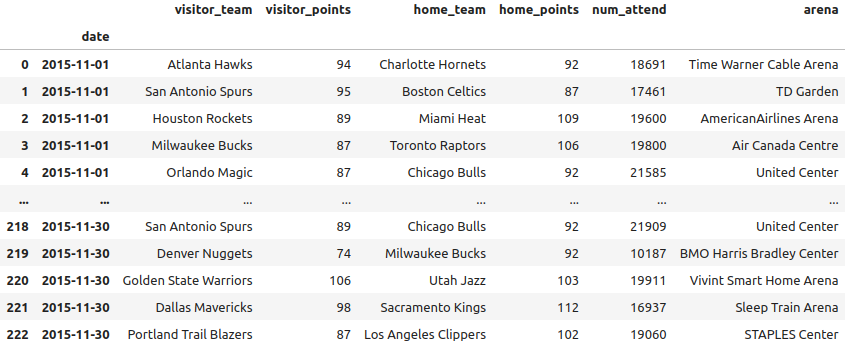

In [44]:
# your code for dataframe cleaning
#
#
#


Pivot tables provide one of the most powerful options for data manipulations. In `pandas` there are multiple ways of leveraging this functionality. We will focus on 

 - [.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and 
 - [.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

 Read the corresponding documentation and answer the following questions using the information in the dataframe above: 

1. What was the maximum number of attendents in each arena in November 2022? 
2. What was the average score of the Golden State Warriors as an away team? 
3. How many points did the Dallas Mavericks score as an away team in each arena?

In [45]:
# your code: What was the maximum number of attendents in each arena in November 2022? 
#
#
#


In [46]:
# your code: What was the average score of the Golden State Warriors as a visiting team? 
#
#
#


In [47]:
# your code: How many points did the Dallas Mavericks score as an away team in each arena?
#
#
#


## Working with Time Series Data 

In [48]:
cs = pd.read_csv('./data/cs_submissions_arxiv_summary.csv', sep=';').rename(columns = {"Sum of Num":"num_cs"})
cs[['month','year']] = cs["Month of Year"].str.split(" ",expand=True)
cs = cs.drop(['Month of Year', 'Archive'], axis=1)
cs

,num_cs,month,year
0,679,January,2012
1,904,February,2012
2,834,March,2012
3,892,April,2012
4,839,May,2012
...,...,...,...
114,5108,July,2021
115,5048,August,2021
116,5704,September,2021
117,6105,October,2021


In [49]:
import calendar
num_to_month = dict(enumerate(calendar.month_name))
month_to_num = {v:k for k,v in num_to_month.items() if k>0}
month_to_num

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

The data above (dataframe `cs`) represents the monthly submissions to arXiv in the subfield of computer science. Transform the original dataframe to 


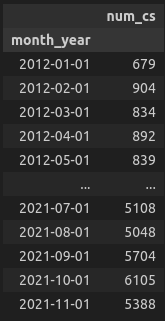

The dictionary `month_to_num` might be useful.

In [50]:
# your code: Transform the CS arXiv submissions dataframe 
#
#
#


Your task is to compute a [moving / rolling average](https://en.wikipedia.org/wiki/Moving_average) of window size 5 (5 months) for the given CS arXiv submissions and to add the computed values as a separate column to the existing dataframe. This can be achieved by using 

 - [.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) and 
 - [.mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)

Plot the original time series and the 5-months-moving average as a lineplot. The result should be similar to: 

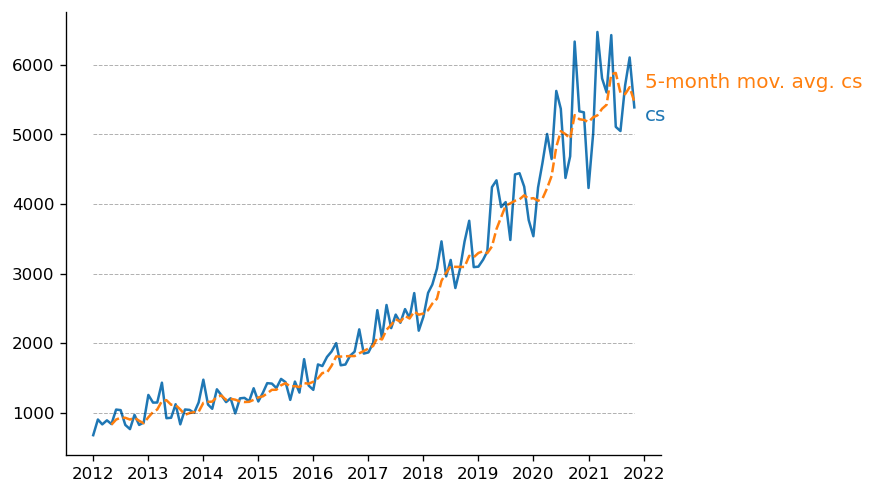




In [51]:
import seaborn as sns 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# your code: compute moving average and plot the original time series and the moving average time series
#
#
#


## References 

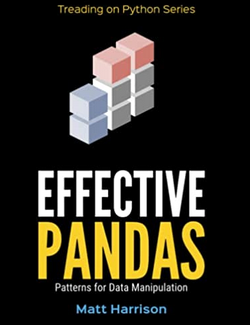